# Customer Analysis Round 5

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
numerical = df.select_dtypes(np.number)

In [5]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


1. X-y split.

In [6]:
X = numerical.drop(columns=['Total Claim Amount'])

In [7]:
y = numerical['Total Claim Amount']

In [8]:
X.shape

(9134, 7)

In [9]:
y.shape

(9134,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape

(7307, 7)

In [12]:
X_test.shape

(1827, 7)

In [13]:
y_train.shape

(7307,)

In [14]:
y_test.shape

(1827,)

2. Normalize (numerical).

* Log Transform

In [15]:
def log_transformer(feature):
    feature = np.log(feature)
    if np.isfinite(feature):
        return feature
    return np.NaN

In [16]:
df_log = pd.DataFrame()

for column in numerical.columns:
    df_log[column] = numerical[column].apply(log_transformer)
    df.head(2)

In [17]:
df_log.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428


In [18]:
numerical.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247


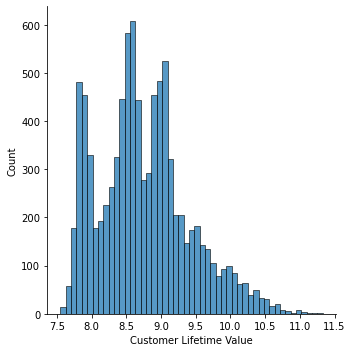

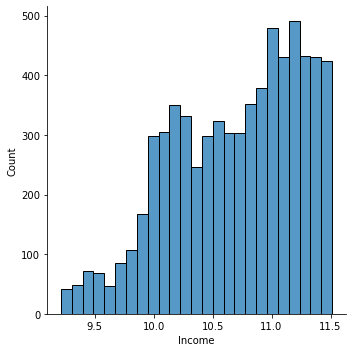

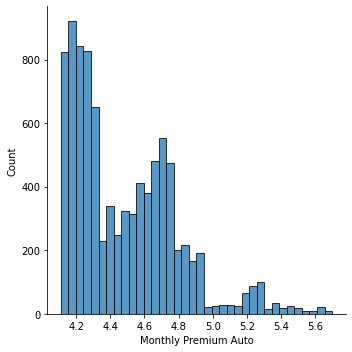

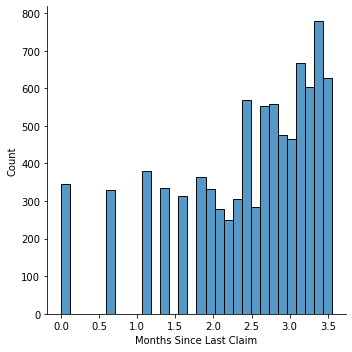

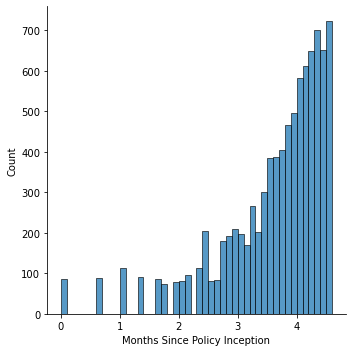

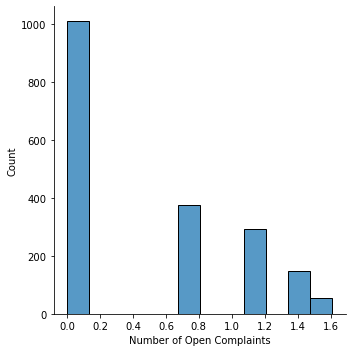

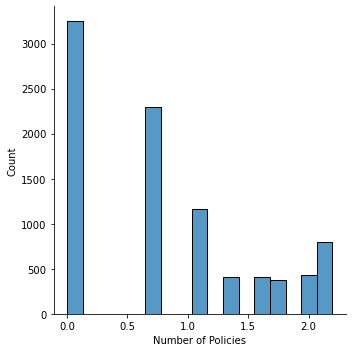

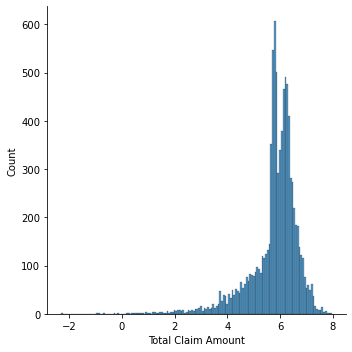

In [19]:
for feature in df_log.columns:
    sns.displot(data = df_log[feature])

* Standard Scaler

In [20]:
standard_scaler = StandardScaler()

In [21]:
scaler = standard_scaler.fit(X)

In [22]:
scaler.mean_

array([8.00494047e+03, 3.76573800e+04, 9.32192906e+01, 1.50970002e+01,
       4.80645938e+01, 3.84388001e-01, 2.96617035e+00])

In [23]:
scaler.scale_

array([6.87059148e+03, 3.03782417e+04, 3.44060838e+01, 1.00727051e+01,
       2.79044632e+01, 9.10333695e-01, 2.39005097e+00])

In [24]:
X_scaled = pd.DataFrame(standard_scaler.transform(X), columns = X.columns)

In [25]:
X_scaled.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247


In [26]:
X.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2


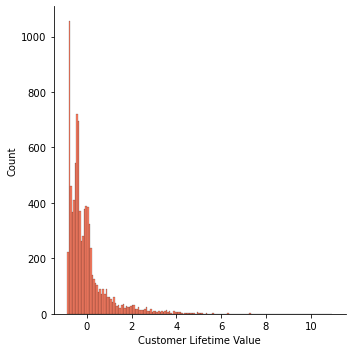

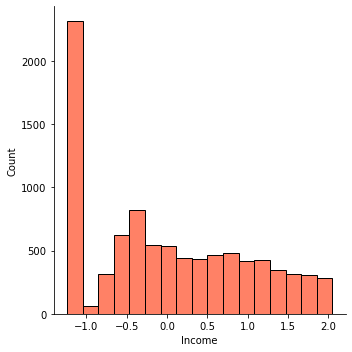

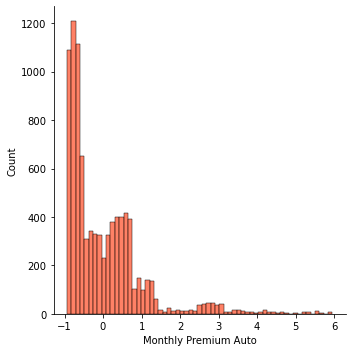

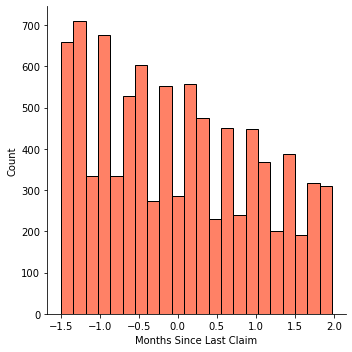

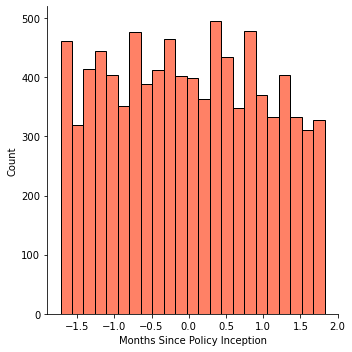

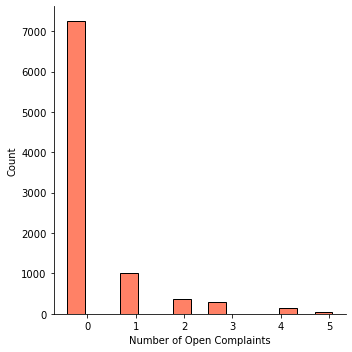

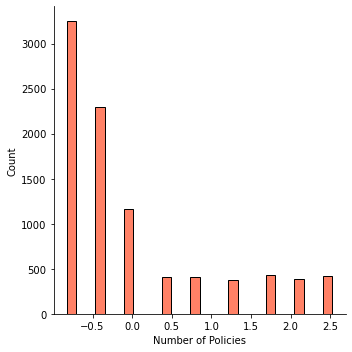

In [27]:
for feature in X_scaled.columns:
    sns.displot(X_scaled[feature], color = '#FF5733')

* MinMax Scaler

In [28]:
minmax_scaler = MinMaxScaler()

In [29]:
scaler = minmax_scaler.fit(X)

In [30]:
X_minmax = pd.DataFrame(minmax_scaler.transform(X), columns = X.columns)

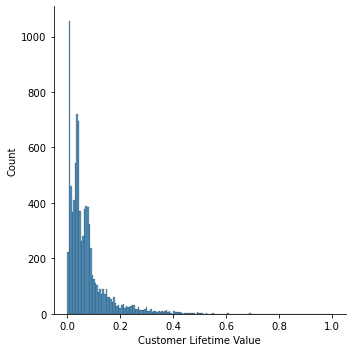

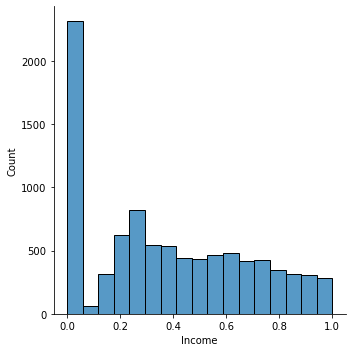

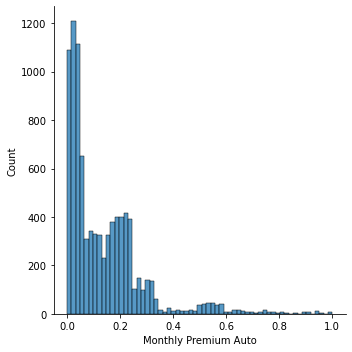

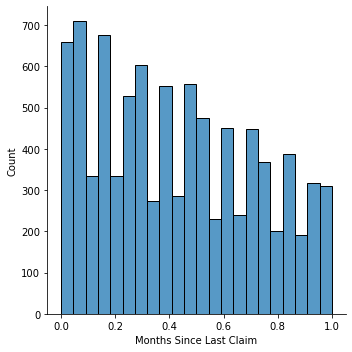

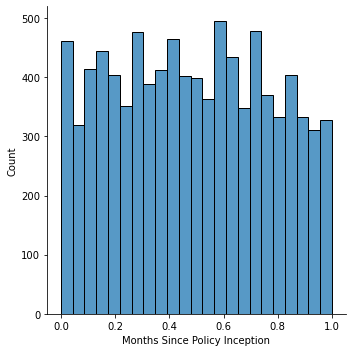

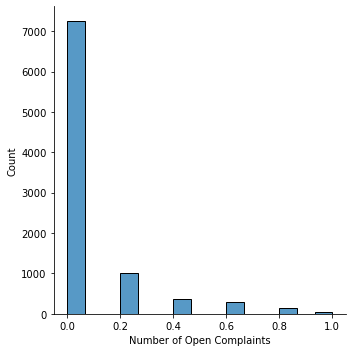

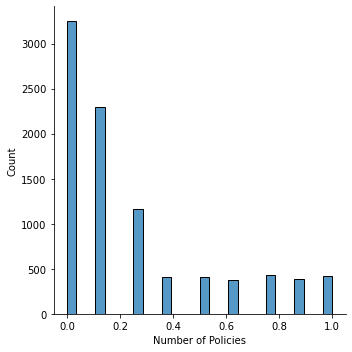

In [31]:
for feature in X_minmax.columns:
    sns.displot(X_minmax[feature])

* Robust Scaler

In [32]:
robust_scaler = RobustScaler()

In [33]:
scaler = robust_scaler.fit(X)

In [34]:
X_robust = pd.DataFrame(robust_scaler.transform(X), columns = X.columns)

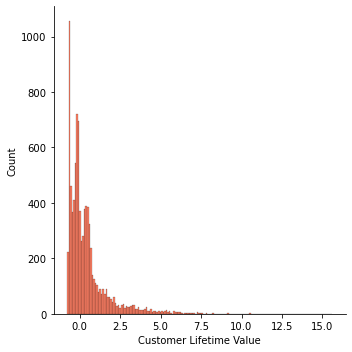

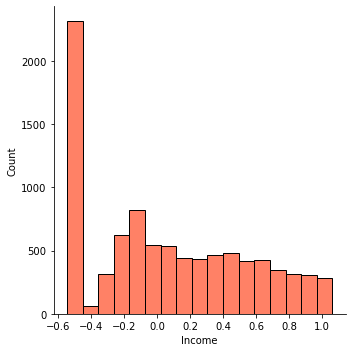

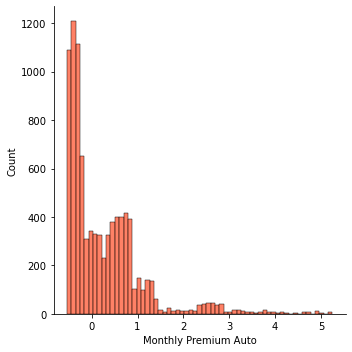

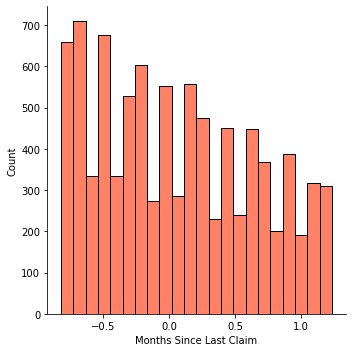

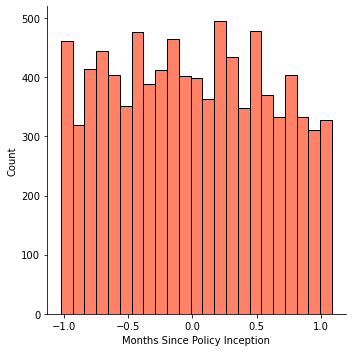

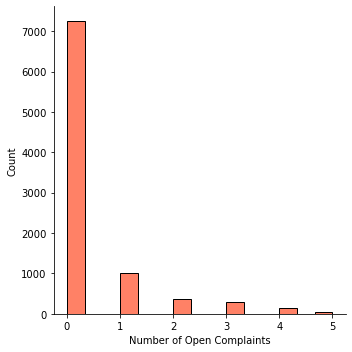

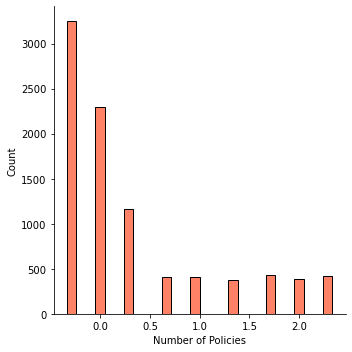

In [35]:
for feature in X_robust.columns:
    sns.displot(X_robust[feature], color = '#FF5733')

* Normalizer

In [36]:
normalizer_scaler = Normalizer()

In [38]:
scaler = normalizer_scaler.fit(X)

In [39]:
X_normalizer = pd.DataFrame(normalizer_scaler.transform(X), columns = X.columns)

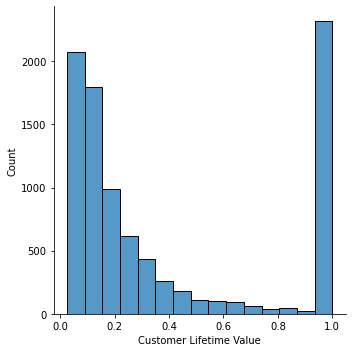

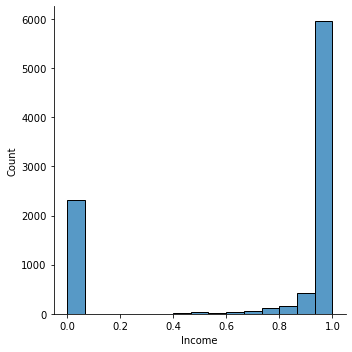

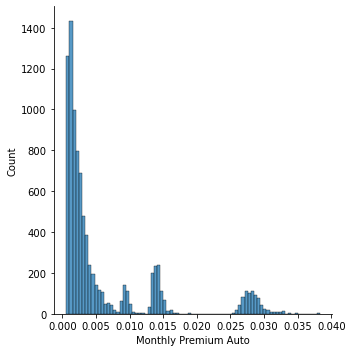

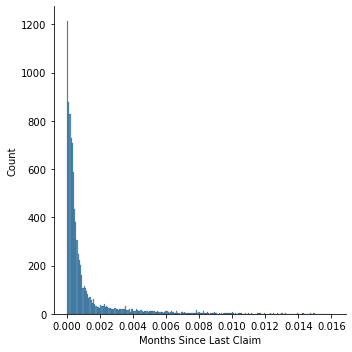

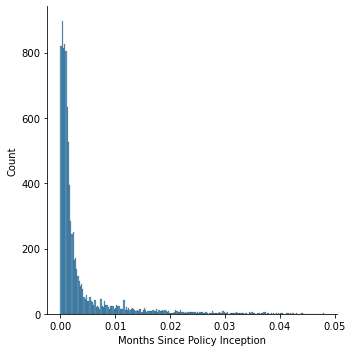

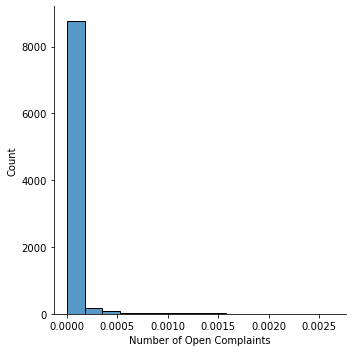

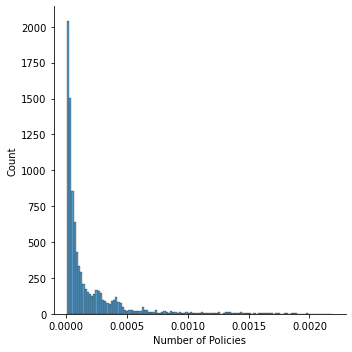

In [40]:
for feature in X_normalizer.columns:
    sns.displot(X_normalizer[feature])